In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from numf.numf import numf
from numf.peaks import get_neighbors
from numf.utils import initialize_matrices

np.random.seed(42)

In [2]:
DATA_DIR_PATH = '../data'
SAVED_OUTPUT_PATH = '../saved_output'

## Variant Test

In [3]:
df = pd.read_csv(f'{DATA_DIR_PATH}/canada_variant_weekly_4w_avg.csv', index_col=0)
df

,Omicron,Delta,Alpha,Beta,Gamma,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,total
2019-12-29,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-05,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-12,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-26,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,2729.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2729.25
2022-09-25,2387.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2387.75
2022-10-02,1801.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1801.00
2022-10-09,1145.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1145.25


<AxesSubplot:>

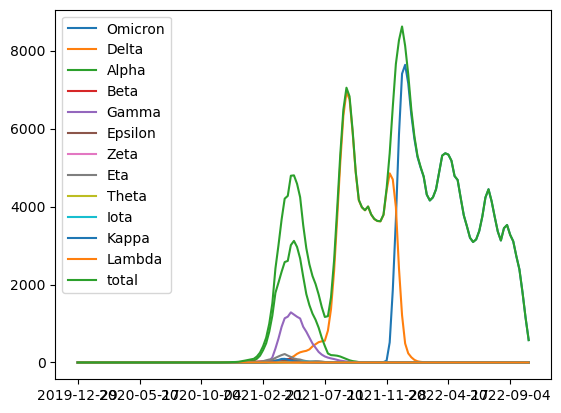

In [4]:
df.plot()

<AxesSubplot:>

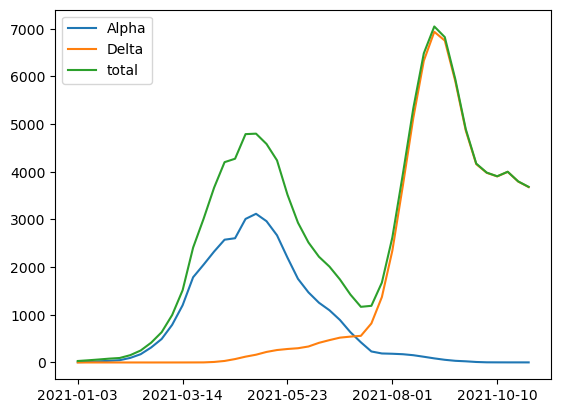

In [5]:
df.loc['2021-01-01': '2021-11-01', ['Alpha', 'Delta', 'total']].plot()

<AxesSubplot:>

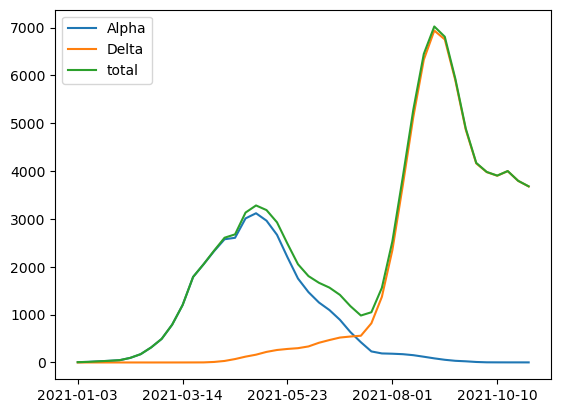

In [6]:
xdf = df.loc['2021-01-01': '2021-11-01', ['Alpha', 'Delta']]
xdf['total'] = xdf.sum(axis=1)
xdf.plot()

In [7]:
M = xdf['total'].to_numpy().reshape(-1, 1)
m, n = M.shape
r = 2

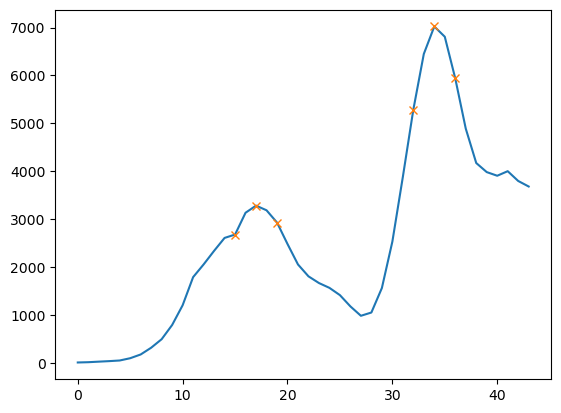

In [8]:
peaks, _ = find_peaks(x=M.reshape(m, ), prominence=1, width=3)
pvals = get_neighbors(peaks, m, nrad=2)

plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

In [9]:
W0, H0 = initialize_matrices(m, n, r)

W, H, plocs = numf(M, W0, H0, pvals=pvals, iters=500)

0.20565172505295576
0.16535732279306242
0.14691942800044114
0.13525892840943646
0.12675809271797975
0.12056334975820537
0.11588673404233965
0.11212059902975104
0.10892895810264787
0.1061244769398437
0.10356281108372947
0.10119017922740893
0.09898031612212288
0.09694916218078478
0.09504523337055856
0.09324986320798301
0.09158096822593566
0.08999795902687459
0.08859389386785159
0.08742140667105404
0.08631763574870938
0.08526889701058642
0.0842659926315025
0.08330273064711662
0.08237476905767936
0.0814789180339474
0.08063170331441685
0.07982326085072151
0.07904115237815751
0.07828290843398797
0.07754664237946947
0.07683086186463746
0.07613434385026192
0.07545605203467581
0.0747950822961584
0.0741506265823285
0.07352194892258672
0.07290836939924716
0.07230925334084436
0.07172400394171304
0.07115205713032262
0.07059287791488913
0.07004595770117157
0.06951081212778239
0.06898696496563077
0.0684739433576379
0.06797129993521202
0.06747861025979161
0.06700490098732756
0.06654990203869665
0.0661

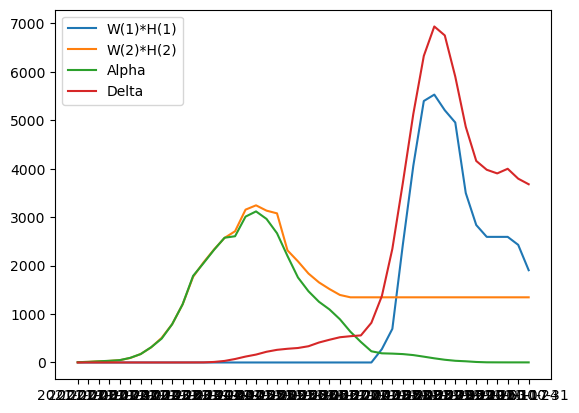

In [10]:
for i in range(r):
    plt.plot(W[:, i] * H[i, :])
plt.plot(xdf['Alpha'])
plt.plot(xdf['Delta'])
plt.legend(['W(1)*H(1)', 'W(2)*H(2)', 'Alpha', 'Delta'])

## Regional Test

In [11]:
df2 = pd.read_csv(f'{DATA_DIR_PATH}/canada_regional_14d_avg.csv', index_col=0)
df2

,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon,total
2020-01-22,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.571429
2020-01-23,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-24,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-25,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-26,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1777.357143,45.5,923.285714,0.0,2.642857,3463.642857
2022-10-04,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1777.357143,45.5,956.571429,0.0,2.214286,3496.500000
2022-10-05,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1812.285714,91.0,958.714286,0.0,2.214286,3579.071429
2022-10-06,0.000000,145.142857,64.000000,164.857143,53.571429,0.0,298.142857,0.0,1812.285714,91.0,928.857143,0.0,2.785714,3560.642857


In [12]:
df2.sum() > 100000

Alberta                       True
British Columbia              True
Manitoba                      True
New Brunswick                False
Newfoundland and Labrador    False
Northwest Territories        False
Nova Scotia                   True
Nunavut                      False
Ontario                       True
Prince Edward Island         False
Quebec                        True
Saskatchewan                  True
Yukon                        False
total                         True
dtype: bool

<AxesSubplot:>

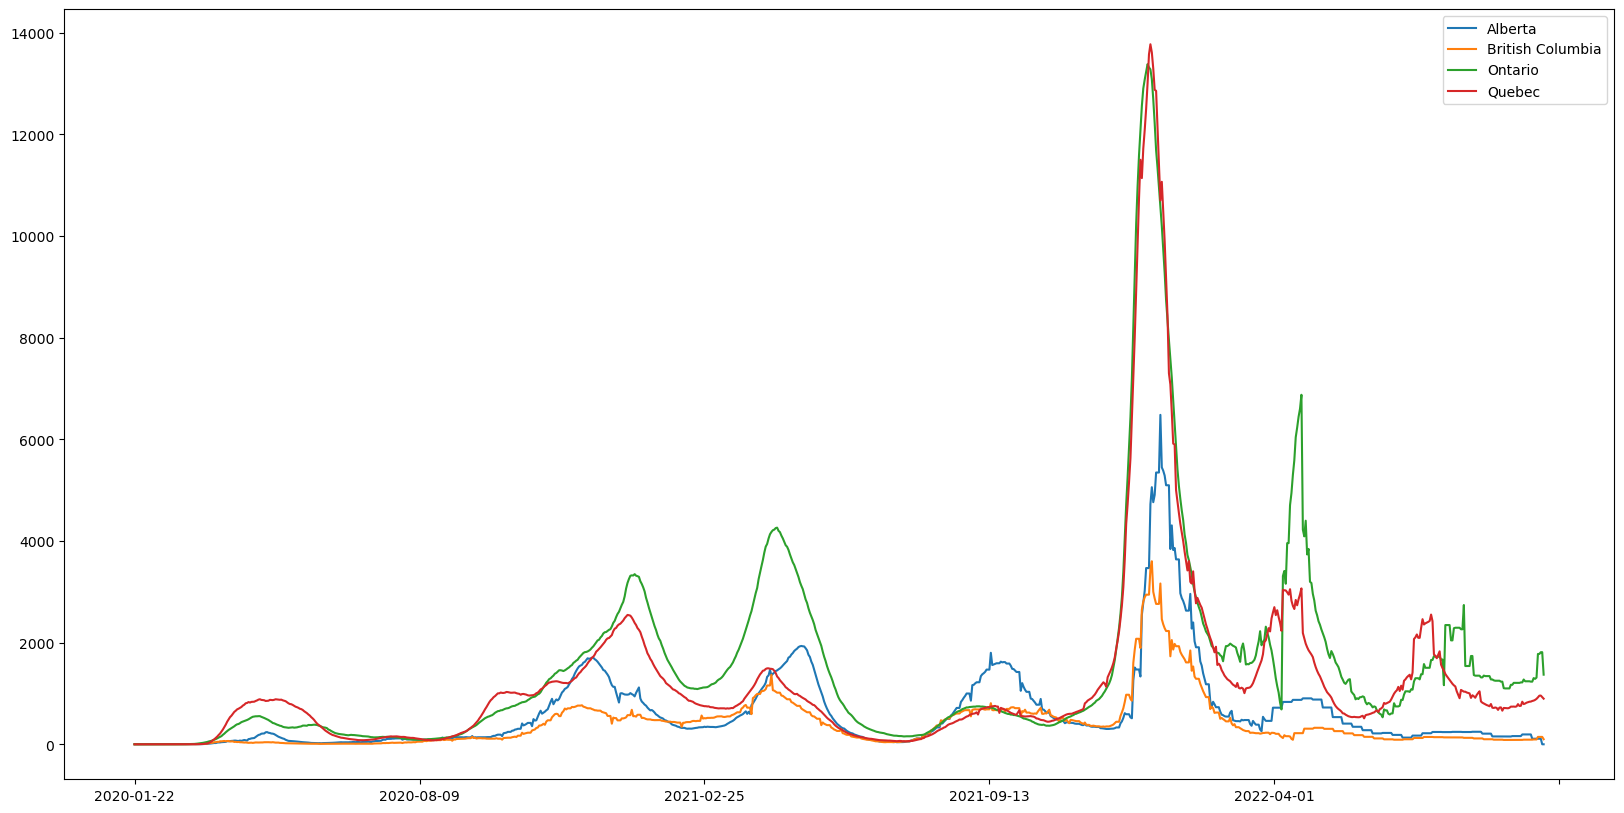

In [13]:
df2.loc[:, df2.sum() > 200000].drop('total', axis=1).plot(figsize=(20, 10))

### Test 1

In [14]:
ydf = df2.loc['2021-03-01': '2021-06-01', ['Quebec', 'Alberta']].copy()

<AxesSubplot:>

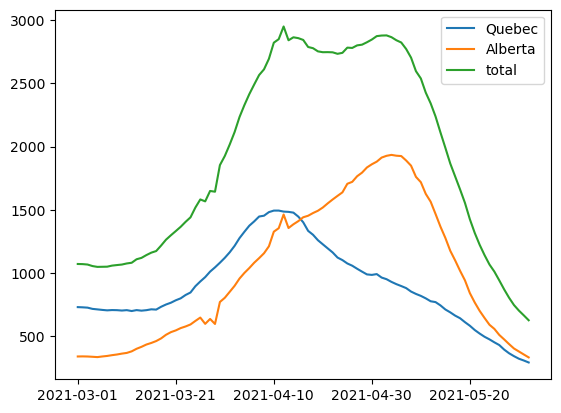

In [15]:
ydf['total'] = ydf.sum(axis=1)
ydf.plot()

In [16]:
M = ydf['total'].to_numpy().reshape(-1, 1)
r = 2

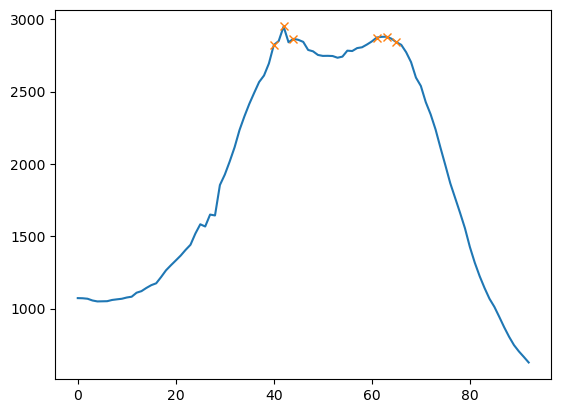

In [17]:
m, n = M.shape
peaks, _ = find_peaks(x=M.reshape(m, ), prominence=1, width=3)
pvals = get_neighbors(peaks, m, nrad=2)

plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

In [18]:
W0, H0 = initialize_matrices(m, n, r)
W, H, plocs = numf(M, W0, H0, pvals=pvals, l2=0.6, iters=100)

0.27704284115886296
0.19070880764886153
0.16779427784256462
0.15059646812491764
0.1403313154815589
0.13259796511657101
0.12592849278384127
0.12008087629528809
0.11478713166867449
0.10992331582775305
0.1054016827257152
0.10118535613371393
0.09724231843381118
0.09351616772740103
0.08999039147683106
0.08667881605731756
0.083564853564258
0.08061091407144597
0.07780949128762589
0.07515224293383647


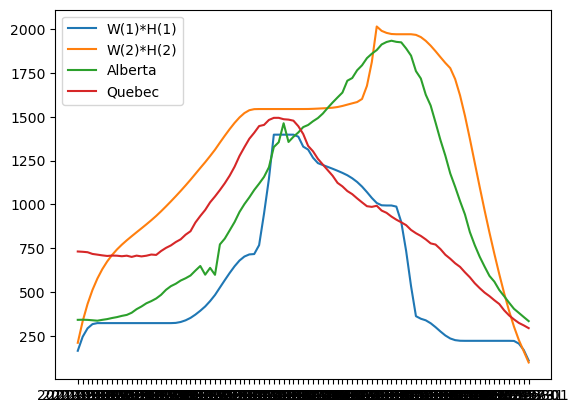

In [19]:
for i in range(r):
    plt.plot(W[:, i] * H[i, :])
plt.plot(ydf['Alberta'])
plt.plot(ydf['Quebec'])
plt.legend(['W(1)*H(1)', 'W(2)*H(2)', 'Alberta', 'Quebec'])

# plt.plot(ydf['total'])

### Test 2

<AxesSubplot:>

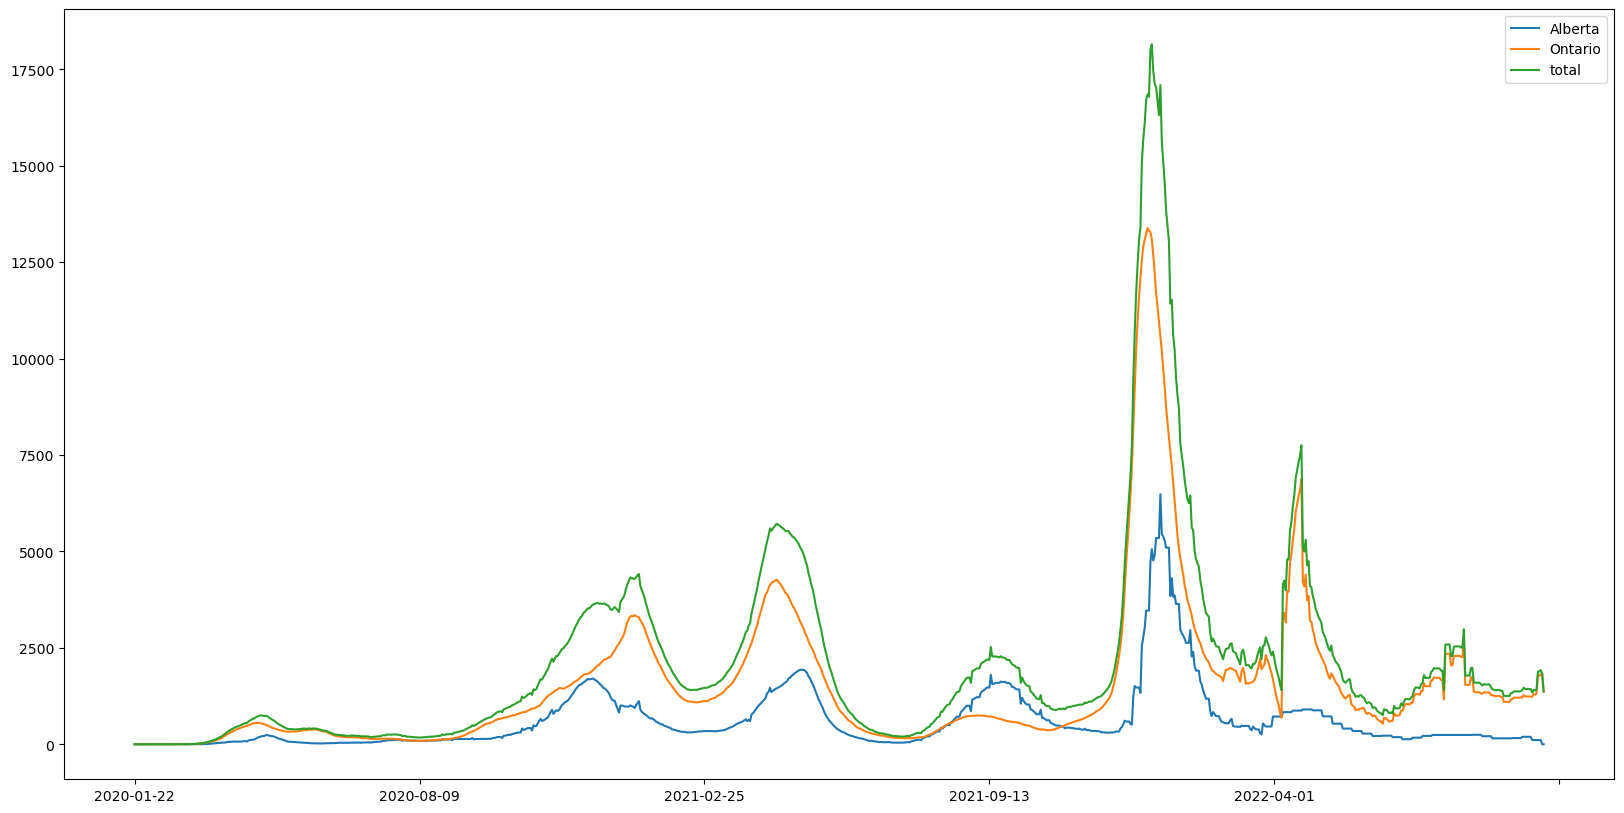

In [20]:
zdf = df2.loc[:, ['Alberta', 'Ontario']]
zdf['total'] = zdf.sum(axis=1)
zdf.plot(figsize=(20, 10))

<AxesSubplot:>

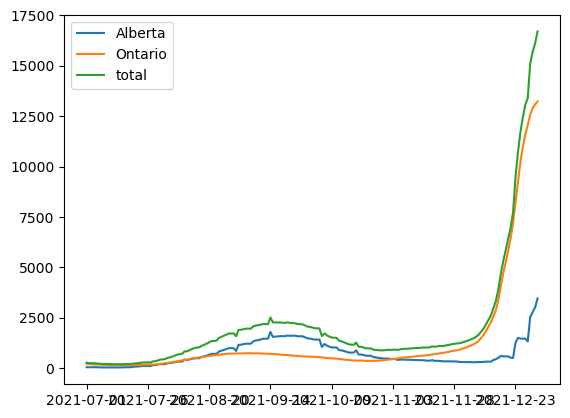

In [21]:
zdf = zdf.loc['2021-07-01': '2022-01-01', :]
zdf.plot()

In [22]:
M = zdf['total'].to_numpy().reshape(-1, 1)
r = 2

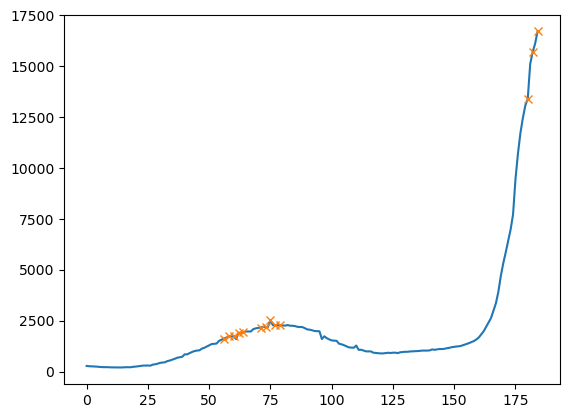

In [23]:
m, n = M.shape
peaks, _ = find_peaks(x=M.reshape(m, ), prominence=1, width=3)
peaks = np.append(peaks, [m-1])
pvals = get_neighbors(peaks, m, nrad=4)
plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

In [24]:
W0, H0 = initialize_matrices(m, n, r)
W, H, plocs = numf(M, W0, H0, pvals=pvals, l2=0.2, iters=500)

0.1933645522822181
0.1776953468215968
0.1656508735300605
0.15624150677584975
0.1479302432382218
0.14112404072072257
0.13546632950388568
0.13068448247281952
0.12661587013308395
0.1231393346014863
0.12017641293891591
0.11771609995785114
0.11569066486803195
0.11401425017142162
0.11261217656255432
0.11142115261966808
0.11039121044442965
0.10948490619846786
0.10867109017098733
0.10792931633559358
0.10724447012211848
0.10660249636712964
0.10599802454975263
0.10541911805749657
0.10486652356703335
0.10432970081224115
0.10380922307520542
0.10329396185478888
0.10278781957564652
0.10228501510509537
0.10178573768368526
0.10129628353223524
0.10080339361320681
0.10032036736047413
0.09984817789226001
0.09937371185446316
0.09890735020204539
0.09845405390067515
0.09800890079036471
0.09755778363037002
0.0971223801537257
0.09670080915979593
0.09628367998711684
0.09585881147176115
0.09544998681093946
0.09505492894233654
0.09467110123701289
0.0942589808000701
0.09386341117843952
0.09348256725974445
0.09311

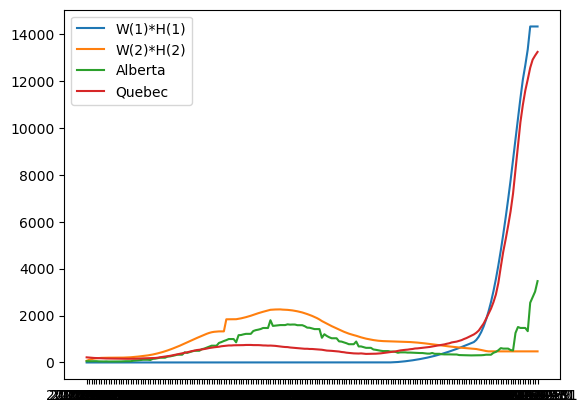

In [25]:
for i in range(r):
    plt.plot(W[:, i] * H[i, :])
plt.plot(zdf['Alberta'])
plt.plot(zdf['Ontario'])
plt.legend(['W(1)*H(1)', 'W(2)*H(2)', 'Alberta', 'Quebec'])